# Vehicle Routing Problem
## Only capacity constraint, no time windows

- $n$ is the number of clients
- $N$ is the set of clients, with $n = \{1,2,.....,n\}$
- $V$ is the set of vertices (or nodes), with $V = \{0\}\cup N$
- $A$ is the set of arcs, with $A = \{(i,j)\in V^2 : i\neq j \}$
- $c_{ij}$ is the cost of travel over arc$(i,j)\in A$
- $Q$ is the vehicle capacity
- $q_i$ is amount that has to be delivered to customer $i\in N$

Then, the formulation is the following:
 
<img src = "VRP_problem_image.jpg" width ="1000"/>

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
rnd = np.random
rnd.seed(0)   # to avoid random numbers in every run of the program

### Initialize number of nodes, capacity of vehicles, demand at each nodes.

In [109]:
n = 25  # number of nodes
Q = 9  #capacity
N = [i for i in range(1,n+1)]  # range takes from 0 to n 
V = [0]+N  # nodes including the source node
q = {i:rnd.randint(1,10) for i in N}   #demand at each node created as dictionary
# q

In [110]:
# rnd.rand(number) creates random numbers with length of array being the number.
# rnd.rand(5)
# V

### Create random locations with coordinate (loc_x, loc_y)

In [111]:
#create random locations
loc_x = rnd.rand(len(V))*200  #create an array of len(V) with random values between 0 and 1
loc_y = rnd.rand(len(V))*100  #200 and 100 are to amplify the numbers

# loc_x

In [112]:
loc_y  # lets see the values 



array([96.98090677, 65.31400358, 17.09095851, 35.8152167 , 75.06861412,
       60.78306687, 32.5047229 ,  3.84254265, 63.4274058 , 95.89492686,
       65.2790317 , 63.50588736, 99.52995677, 58.18503294, 41.43685882,
       47.46975023, 62.35101011, 33.80076148, 67.47523223, 31.72017421,
       77.8345482 , 94.95710535, 66.2526867 ,  1.35716356, 62.28460955,
       67.36596308])

### Let us plot the nodes(source and demand) with their demands
### This way we can visualize the nodes

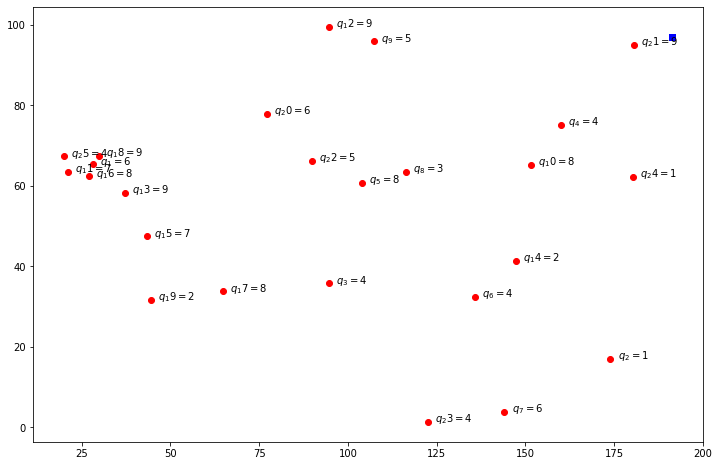

In [125]:
plt.rcParams["figure.figsize"]= (12,8) 
plt.scatter(loc_x[1:],loc_y[1:], c= 'r')  #the first one is the depot, so not plotting the depot here
#write the demand at the side of the coordinates

# the codes below plots the values in the same graph plotted by the line above 
for i in N:
    plt.annotate('$q_%d = %d$'%(i,q[i]), (loc_x[i]+2,loc_y[i]))
    plt.plot(loc_x[0],loc_y[0], c = 'b', marker = 's')             # origin marker is square shape and blue
#     plt.annotate('SRC',(loc_x[0]+2,loc_y[0]))
#     plt.axis('equal')

### Now that we have the coordinates for source and demand, let us now create the arcs
### Arcs can go from one to all but not to oneself

In [114]:
# create the arcs
A = [(i,j) for i in V for j in V if i!=j] # arcs cannot go from itself
# A
# hypot uses the numpy library to calculate the euclidean distance
c = {(i,j):np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i,j in A}  #dictionary (arcs): distance
# c

### Model creation using docplex library

In [115]:
# !pip install docplex

from docplex.mp.model import Model  #cp is for constrained programming, mp is for mathematical programming
#create a model

mdl = Model('CVRP')  #CVRP is the name of the model
# setup.py install

### Define the Decision Variables

In [116]:
# Defining Dvs
x = mdl.binary_var_dict(A, name= 'x')  #creates decision variables xij in dictionary format
# as many x variable as I have in the list A (all arcs), x is the name of the variable

u = mdl.continuous_var_dict(N, ub = Q, name = 'u')  #creates DVs for every client in dict format, also defines the UB for u
#by default continuous variables have a value of 0

###  Define the Objective Function and constraints
### Set log_output to true if you want to see the log while CPLEX is solving hte problem

In [117]:
# Objective

mdl.minimize(mdl.sum(c[i,j]*x[i,j] for i,j in A))

#Constraints
mdl.add_constraints(mdl.sum(x[i,j] for j in V if j!=i)==1 for i in N)
mdl.add_constraints(mdl.sum(x[i,j] for i in V if i!=j)==1 for j in N)

#whenever x[i,j] is 1, u[i]+q[j]==u[j]
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i,j],u[i]+q[j]==u[j]) for i,j in A if i!=0 and j!=0)


mdl.add_constraints(u[i]>=q[i] for i in N)
# mdl.parameters.timelimit = 15
solution = mdl.solve(log_output = True)  # log_output = True displays the solve log of CPLEX solver

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Found incumbent of value 5507.568576 after 0.00 sec. (0.06 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 33 rows and 420 columns.
MIP Presolve modified 96 coefficients.
Aggregator did 96 substitutions.
Reduced MIP has 188 rows, 351 columns, and 814 nonzeros.
Reduced MIP has 234 binaries, 0 generals, 0 SOSs, and 142 indicators.
Presolve time = 0.03 sec. (1.16 ticks)
Probing time = 0.02 sec. (1.09 ticks)
Tried aggregator 2 times.
Detecting symmetries...
Aggregator did 25 substitutions.
Reduced MIP has 163 rows, 326 columns, and 789 nonzeros.
Reduced MIP has 234 binaries, 0 generals, 0 SOSs, and 142 indicators.
Presolve time = 0.03 sec. (0.97 ticks)
Probing time = 0.00 sec. (0.97 ticks)
Clique table members: 648.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: det

  89787 14165        cutoff           4160.0941     3974.4319  1776506    4.46%
  94590 14423    infeasible           4160.0941     3977.4542  1849407    4.39%
  98414 14665     4014.7288    41     4160.0941     3980.5497  1937220    4.32%
Elapsed time = 72.88 sec. (22332.55 ticks, tree = 5.49 MB, solutions = 8)
 102815 14967     4148.5421    28     4160.0941     3983.1562  2014006    4.25%
 107095 15265        cutoff           4160.0941     3986.0812  2098216    4.18%
 111500 15485     4006.6977    36     4160.0941     3988.7636  2170782    4.12%
 116085 15725        cutoff           4160.0941     3991.3116  2257300    4.06%
 120570 15894        cutoff           4160.0941     3993.7754  2336616    4.00%
 125098 16081     4131.0703    27     4160.0941     3996.3629  2401307    3.94%
 129062 16288        cutoff           4160.0941     3998.7174  2488442    3.88%
 133149 16445     4135.0903    36     4160.0941     4001.4246  2563122    3.81%
 137572 16619        cutoff           4160.094

### Print the solution for the model that is solved by CPLEX (Objective value and DVs)

In [118]:
print(solution)  # only the non-zero DVs are printed
# help('version')

solution for: CVRP
objective: 4160.09
x_0_2=1
x_0_4=1
x_0_5=1
x_0_6=1
x_0_8=1
x_0_9=1
x_0_10=1
x_0_11=1
x_0_12=1
x_0_13=1
x_0_15=1
x_0_16=1
x_0_17=1
x_0_18=1
x_0_20=1
x_0_21=1
x_0_22=1
x_1_0=1
x_2_7=1
x_3_0=1
x_4_0=1
x_5_0=1
x_6_23=1
x_7_14=1
x_8_1=1
x_9_25=1
x_10_0=1
x_11_0=1
x_12_0=1
x_13_0=1
x_14_0=1
x_15_19=1
x_16_0=1
x_17_0=1
x_18_0=1
x_19_0=1
x_20_0=1
x_21_0=1
x_22_3=1
x_23_24=1
x_24_0=1
x_25_0=1
u_1=9.000
u_2=1.000
u_3=9.000
u_4=9.000
u_5=9.000
u_6=4.000
u_7=7.000
u_8=3.000
u_9=5.000
u_10=9.000
u_11=9.000
u_12=9.000
u_13=9.000
u_14=9.000
u_15=7.000
u_16=9.000
u_17=9.000
u_18=9.000
u_19=9.000
u_20=9.000
u_21=9.000
u_22=5.000
u_23=8.000
u_24=9.000
u_25=9.000



### Let us see if the Objective value found in Optimal or not, also displays the time to solve the model.

In [119]:
#solution status
# solution.solve_status
# mdl.solve_details   # gives time taken, solution type (feasible, infeasible, optimal)
solution.solve_details

docplex.mp.SolveDetails(time=240.39,status='integer optimal, tolerance')

###  Let us find the active arcs, the active arcs are those which are selected by the model.

In [120]:
#Active arcs
active_arcs = [a for a in A if x[a].solution_value>0.9]   # its better to compare with 0.9 rather than with 1, causes errors in large problems
# active_arcs

### Lets us plot the active arcs in the graph, we can see hte routes as well 

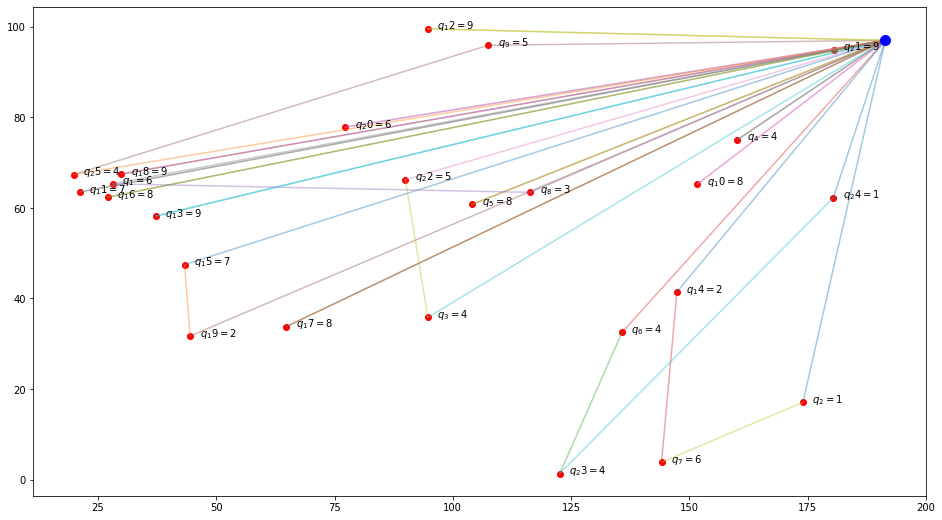

In [121]:
plt.rcParams["figure.figsize"]= (16,9)  # setting the figure size, default is small and difficult to interpret
plt.scatter(loc_x[1:],loc_y[1:], c= 'r')  #except the depot plot all the nodes with red color
#write the demand at the side of the coordinates

# the codes below plots the values at the nodes in the same graph plotted by the line above 
for i in N:
    plt.annotate('$q_%d = %d$'%(i,q[i]), (loc_x[i]+2,loc_y[i]))

# Plot the active arcs
for i, j in active_arcs:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]], alpha = 0.4)  # plots the arcs

#Plot the source node
plt.plot(loc_x[0],loc_y[0], c = 'b',marker ='o', markersize = 10)  # plot the origin as square synbol, s for square, o for circle
# plt.axis('equal')

In [122]:
 print('Done')

Done
